Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import covid dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_czovid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [3]:
#reset index and drop old one
covid_df.reset_index(drop=True, inplace=True)

In [4]:
covid_df.head() #inspect updated df

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


***
#1 
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should:

-Show cases over time

-Have all counties plotted in a background color (something like grey)

-Have a single county plotted in a contrasting color (something not grey)

-Have well formatted dates as the X axis
***

In [5]:
#create new dataframe that is only Utah counties
utah_covid = covid_df[covid_df['Province_State'] == 'Utah']
utah_covid.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
2956,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",...,58041,58041,58131,58131,58131,58131,58131,58131,58131,58205
2957,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",...,0,0,0,0,0,0,0,0,0,0
2958,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",...,0,0,0,0,0,0,0,0,0,0
2959,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",...,0,0,0,0,0,0,0,0,0,0
2960,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",...,0,0,0,0,0,0,0,0,0,0


In [6]:
#reset index and drop old index
utah_covid.reset_index(drop = True, inplace=True)

In [7]:
utah_covid.head() #inspect new df

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",...,58041,58041,58131,58131,58131,58131,58131,58131,58131,58205
1,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",...,0,0,0,0,0,0,0,0,0,0
2,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",...,0,0,0,0,0,0,0,0,0,0
3,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",...,0,0,0,0,0,0,0,0,0,0
4,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",...,0,0,0,0,0,0,0,0,0,0


In [15]:
#check all column names and dates:
#print(utah_covid.columns.tolist())
#first date is 1/22/20 and last date is 3/9/23

In [8]:
#reshape the data on Admin2(county), date
utah_covid_long = pd.melt(
    utah_covid, 
    id_vars = ['Admin2'], 
    value_vars = utah_covid.columns[11:], #only want the date columns
    var_name = 'Date',
    value_name='Cases')

In [9]:
utah_covid_long.head() #inspect long format

,Admin2,Date,Cases
0,Bear River,1/23/20,0
1,Beaver,1/23/20,0
2,Box Elder,1/23/20,0
3,Cache,1/23/20,0
4,Carbon,1/23/20,0


In [10]:
#rename 'Admin2' column to 'County'
utah_covid_long.columns = ['County', 'Date', 'NumofCases']
utah_covid_long

,County,Date,NumofCases
0,Bear River,1/23/20,0
1,Beaver,1/23/20,0
2,Box Elder,1/23/20,0
3,Cache,1/23/20,0
4,Carbon,1/23/20,0
...,...,...,...
42249,Wasatch,3/9/23,12224
42250,Washington,3/9/23,0
42251,Wayne,3/9/23,0
42252,Weber,3/9/23,0


In [11]:
#convert date column to 'date' datatype
utah_covid_long['Date'] = pd.to_datetime(utah_covid_long['Date'], format = '%m/%d/%y')

In [12]:
#sort columns by County/Day
utah_covid_long = utah_covid_long.sort_values(by = ['County', 'Date'])

In [13]:
#get difference in case numbers/day
utah_covid_long['NewCases'] = utah_covid_long.groupby('County')['NumofCases'].diff().fillna(0)

In [14]:
utah_covid_long

,County,Date,NumofCases,NewCases
0,Bear River,2020-01-23,0,0.0
37,Bear River,2020-01-24,0,0.0
74,Bear River,2020-01-25,0,0.0
111,Bear River,2020-01-26,0,0.0
148,Bear River,2020-01-27,0,0.0
...,...,...,...,...
42105,Weber-Morgan,2023-03-05,89421,0.0
42142,Weber-Morgan,2023-03-06,89421,0.0
42179,Weber-Morgan,2023-03-07,89421,0.0
42216,Weber-Morgan,2023-03-08,89421,0.0


In [90]:
#counties
allcounties = utah_covid_long['County'].unique()
print(allcounties)

['Bear River' 'Beaver' 'Box Elder' 'Cache' 'Carbon' 'Central Utah'
 'Daggett' 'Davis' 'Duchesne' 'Emery' 'Garfield' 'Grand' 'Iron' 'Juab'
 'Kane' 'Millard' 'Morgan' 'Out of UT' 'Piute' 'Rich' 'Salt Lake'
 'San Juan' 'Sanpete' 'Sevier' 'Southeast Utah' 'Southwest Utah' 'Summit'
 'Tooele' 'TriCounty' 'Uintah' 'Unassigned' 'Utah' 'Wasatch' 'Washington'
 'Wayne' 'Weber' 'Weber-Morgan']


In [91]:
#select county to highlight (salt lake)
highlight_county = 'Salt Lake'

In [108]:
#grey out 'allcounties' and highlight 'salt lake'
palette = {county: '#D3D3D3' for county in allcounties}
palette[highlight_county]='#3ABFC0'

<function matplotlib.pyplot.show(close=None, block=None)>

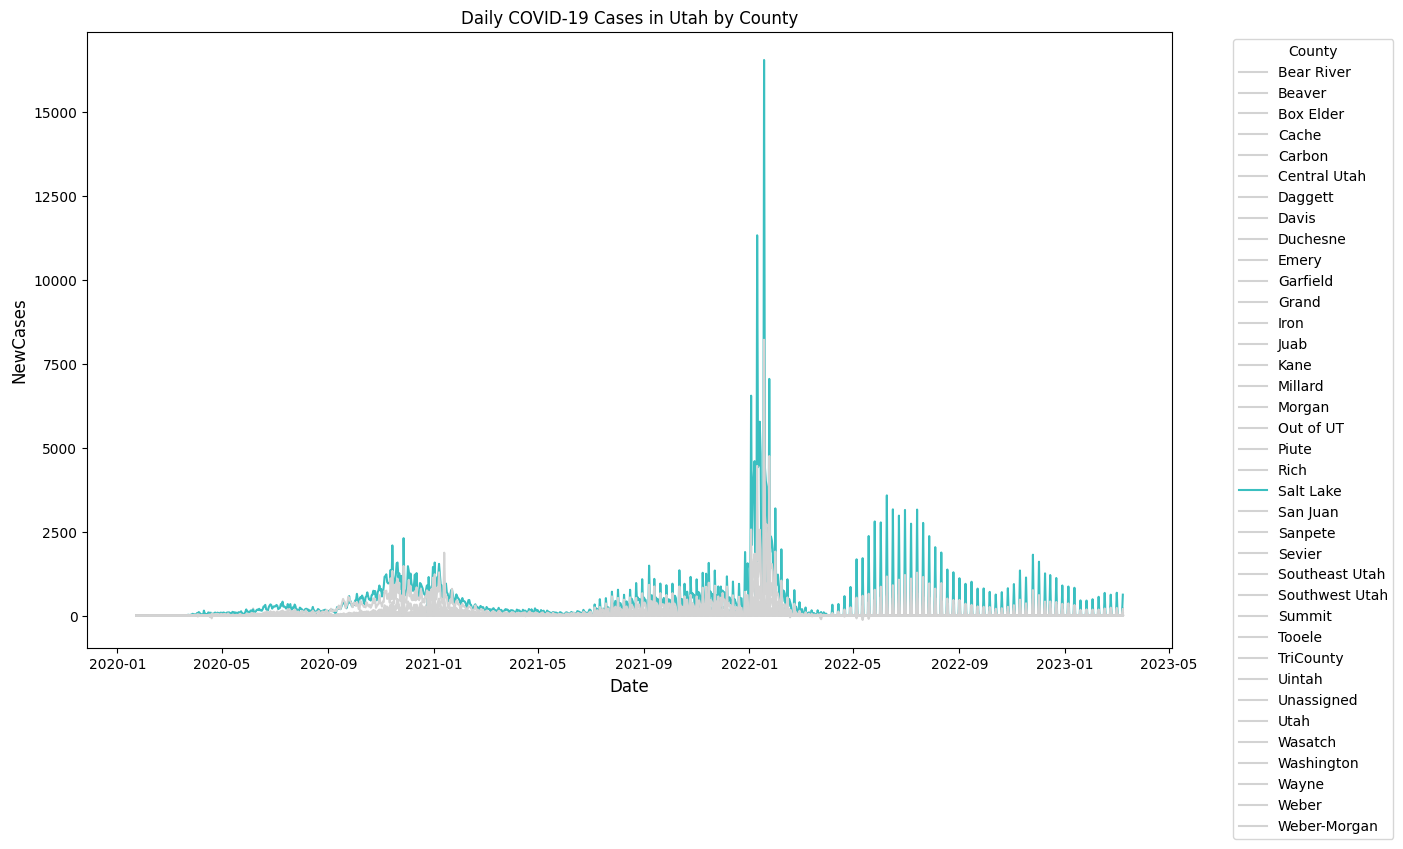

In [110]:
#create visualization that groups by county
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=utah_covid_long,
    x='Date',
    y='NewCases',
    hue='County',  # Each county gets its own line
    palette=palette
)

#customize
plt.title('Daily COVID-19 Cases in Utah by County')
plt.xlabel('Date', fontsize=12)
plt.ylabel('NewCases', fontsize=12)
plt.legend(title='County',bbox_to_anchor = (1.05,1))
plt.show


***
#2 

Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:

-Have only two counties plotted

-Highlight the difference between the two comparison counties

You may use any style of graphic you like as long as it is effective (dense)
and readable
***

In [113]:
#find date and county that had the most cases
max_cases = (utah_covid_long[utah_covid_long.NumofCases == utah_covid_long.NumofCases.max()])
print(max_cases)

          County       Date  NumofCases  NewCases
42237  Salt Lake 2023-03-09      410508     628.0


In [17]:
#create df that is only Salt Lake county
saltLake = utah_covid_long[utah_covid_long['County']=='Salt Lake']
saltLake.head()

,County,Date,NumofCases,NewCases
20,Salt Lake,2020-01-23,0,0.0
57,Salt Lake,2020-01-24,0,0.0
94,Salt Lake,2020-01-25,0,0.0
131,Salt Lake,2020-01-26,0,0.0
168,Salt Lake,2020-01-27,0,0.0


In [18]:
#reset index and drop old index
saltLake.reset_index(drop = True, inplace=True)
saltLake.head()

,County,Date,NumofCases,NewCases
0,Salt Lake,2020-01-23,0,0.0
1,Salt Lake,2020-01-24,0,0.0
2,Salt Lake,2020-01-25,0,0.0
3,Salt Lake,2020-01-26,0,0.0
4,Salt Lake,2020-01-27,0,0.0


In [118]:
#find county in Florida with highest numbers
florida_covid = covid_df[covid_df['Province_State'] == 'Florida']
florida_covid.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
342,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",...,89071,89071,89071,89806,89806,89806,89806,89806,89806,89806
343,US,USA,840,12003.0,Baker,Florida,US,30.330601,-82.284675,"Baker, Florida, US",...,10669,10669,10669,10746,10746,10746,10746,10746,10746,10746
344,US,USA,840,12005.0,Bay,Florida,US,30.265487,-85.621226,"Bay, Florida, US",...,55804,55804,55804,56189,56189,56189,56189,56189,56189,56189
345,US,USA,840,12007.0,Bradford,Florida,US,29.950797,-82.166116,"Bradford, Florida, US",...,9161,9161,9161,9245,9245,9245,9245,9245,9245,9245
346,US,USA,840,12009.0,Brevard,Florida,US,28.294095,-80.730910,"Brevard, Florida, US",...,174061,174061,174061,175277,175277,175277,175277,175277,175277,175277


In [119]:
florida_covid.reset_index(drop=True, inplace = True)
florida_covid.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,US,USA,840,12001.0,Alachua,Florida,US,29.678665,-82.359282,"Alachua, Florida, US",...,89071,89071,89071,89806,89806,89806,89806,89806,89806,89806
1,US,USA,840,12003.0,Baker,Florida,US,30.330601,-82.284675,"Baker, Florida, US",...,10669,10669,10669,10746,10746,10746,10746,10746,10746,10746
2,US,USA,840,12005.0,Bay,Florida,US,30.265487,-85.621226,"Bay, Florida, US",...,55804,55804,55804,56189,56189,56189,56189,56189,56189,56189
3,US,USA,840,12007.0,Bradford,Florida,US,29.950797,-82.166116,"Bradford, Florida, US",...,9161,9161,9161,9245,9245,9245,9245,9245,9245,9245
4,US,USA,840,12009.0,Brevard,Florida,US,28.294095,-80.730910,"Brevard, Florida, US",...,174061,174061,174061,175277,175277,175277,175277,175277,175277,175277


In [120]:
#make florida data long
florida_covid_long = pd.melt(
    florida_covid, 
    id_vars = ['Admin2'], 
    value_vars = florida_covid.columns[11:], #only want the date columns
    var_name = 'Date',
    value_name='Cases')

In [121]:
florida_covid_long.head()

,Admin2,Date,Cases
0,Alachua,1/23/20,0
1,Baker,1/23/20,0
2,Bay,1/23/20,0
3,Bradford,1/23/20,0
4,Brevard,1/23/20,0


In [122]:
#rename 'Admin2' column to 'County'
florida_covid_long.columns = ['County', 'Date', 'NumofCases']
florida_covid_long

,County,Date,NumofCases
0,Alachua,1/23/20,0
1,Baker,1/23/20,0
2,Bay,1/23/20,0
3,Bradford,1/23/20,0
4,Brevard,1/23/20,0
...,...,...,...
78793,Union,3/9/23,5131
78794,Volusia,3/9/23,151166
78795,Wakulla,3/9/23,12188
78796,Walton,3/9/23,20605


In [123]:
#convert date column to 'date' datatype
florida_covid_long['Date'] = pd.to_datetime(florida_covid_long['Date'], format = '%m/%d/%y')

In [124]:
#sort columns by County/Day
florida_covid_long = florida_covid_long.sort_values(by = ['County', 'Date'])

In [126]:
#get difference in case numbers/day
florida_covid_long['NewCases'] = florida_covid_long.groupby('County')['NumofCases'].diff().fillna(0)
florida_covid_long

,County,Date,NumofCases,NewCases
0,Alachua,2020-01-23,0,0.0
69,Alachua,2020-01-24,0,0.0
138,Alachua,2020-01-25,0,0.0
207,Alachua,2020-01-26,0,0.0
276,Alachua,2020-01-27,0,0.0
...,...,...,...,...
78521,Washington,2023-03-05,7746,0.0
78590,Washington,2023-03-06,7746,0.0
78659,Washington,2023-03-07,7746,0.0
78728,Washington,2023-03-08,7746,0.0


In [128]:
#find county with max number of cases
max_fl_cases = (florida_covid_long[florida_covid_long.NumofCases == florida_covid_long.NumofCases.max()])
max_fl_cases.head() #county is Miami-Dade

,County,Date,NumofCases,NewCases
78357,Miami-Dade,2023-03-03,1552197,13795.0
78426,Miami-Dade,2023-03-04,1552197,0.0
78495,Miami-Dade,2023-03-05,1552197,0.0
78564,Miami-Dade,2023-03-06,1552197,0.0
78633,Miami-Dade,2023-03-07,1552197,0.0


In [130]:
#create df that is only Miami-Dade county
miamiDade = florida_covid_long[florida_covid_long['County']=='Miami-Dade']
miamiDade.head()

,County,Date,NumofCases,NewCases
42,Miami-Dade,2020-01-23,0,0.0
111,Miami-Dade,2020-01-24,0,0.0
180,Miami-Dade,2020-01-25,0,0.0
249,Miami-Dade,2020-01-26,0,0.0
318,Miami-Dade,2020-01-27,0,0.0


In [132]:
#reset index and drop old index
miamiDade.reset_index(drop = True, inplace=True)
miamiDade.head()

,County,Date,NumofCases,NewCases
0,Miami-Dade,2020-01-23,0,0.0
1,Miami-Dade,2020-01-24,0,0.0
2,Miami-Dade,2020-01-25,0,0.0
3,Miami-Dade,2020-01-26,0,0.0
4,Miami-Dade,2020-01-27,0,0.0


In [134]:
#merge datasets
compare_cases = pd.concat([saltLake,miamiDade])
compare_cases.head()

,County,Date,NumofCases,NewCases
0,Salt Lake,2020-01-23,0,0.0
1,Salt Lake,2020-01-24,0,0.0
2,Salt Lake,2020-01-25,0,0.0
3,Salt Lake,2020-01-26,0,0.0
4,Salt Lake,2020-01-27,0,0.0


Text(0.5, 1.0, 'Daily COVID Cases: Miami-Dade vs Salt Lake County')

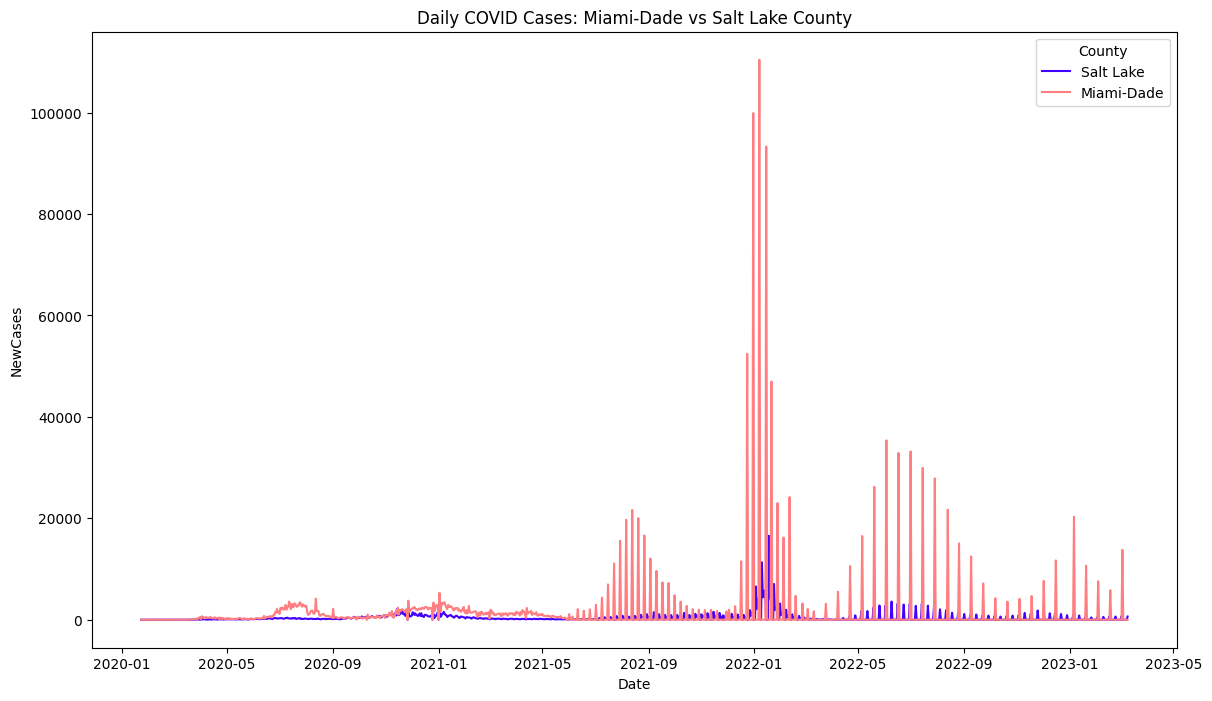

In [152]:
#create visualization that groupbys county and month
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=compare_cases,
    x='Date',
    y='NewCases',
    hue='County',  # Each county gets its own line
    palette='gnuplot2'
)
plt.title('Daily COVID Cases: Miami-Dade vs Salt Lake County')

***
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:

-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

-Use color to contrast the two series being plotted

-Have well formatted dates as the X axis
***

In [19]:
#running totals for salt lake county
saltLake.head()

,County,Date,NumofCases,NewCases
0,Salt Lake,2020-01-23,0,0.0
1,Salt Lake,2020-01-24,0,0.0
2,Salt Lake,2020-01-25,0,0.0
3,Salt Lake,2020-01-26,0,0.0
4,Salt Lake,2020-01-27,0,0.0


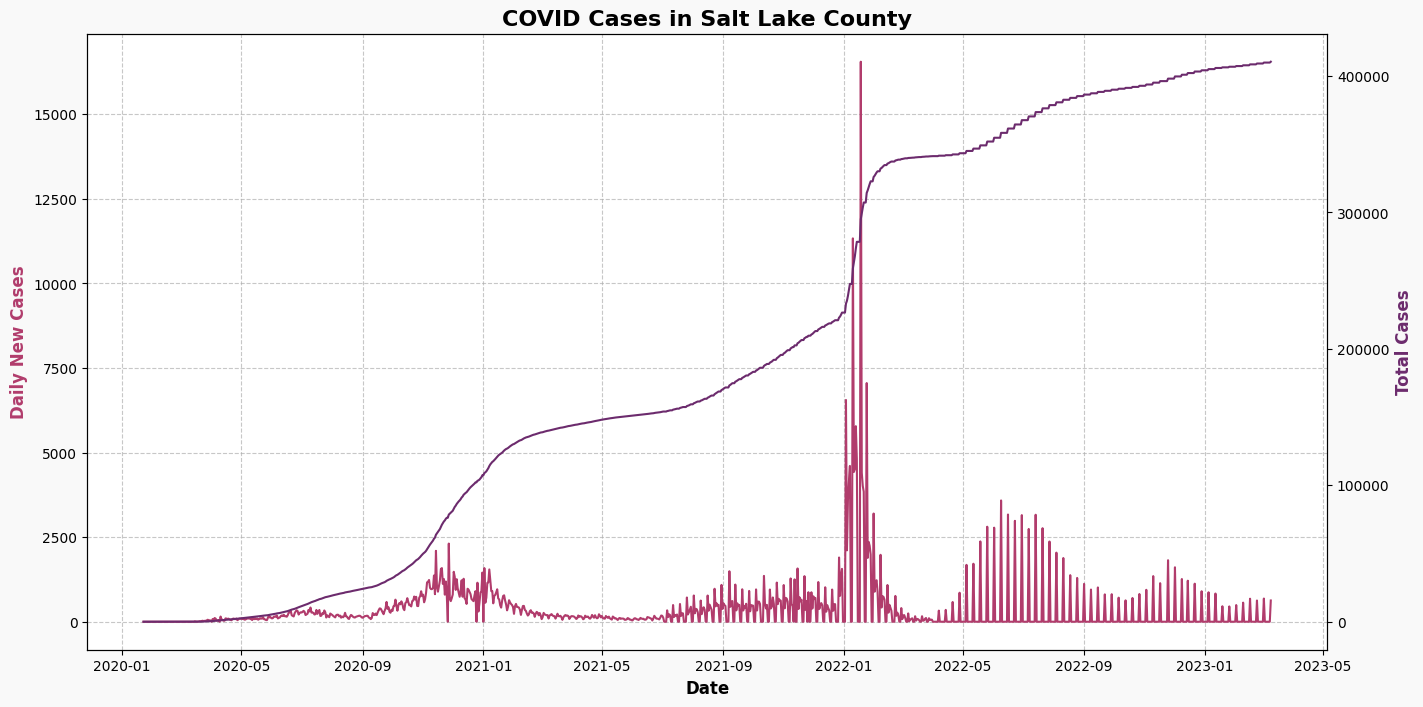

In [182]:
fig, ax1 = plt.subplots(figsize=(16, 8))

palette=sns.color_palette('flare', n_colors =6) #set color palette for the lines
color1=palette[3]
color2=palette[5]

ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Daily New Cases', color=color1, fontsize=12, fontweight='bold')
ax1.plot(saltLake['Date'], saltLake['NewCases'], color = color1, label='Daily New Cases')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which='major', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('Total Cases', color=color2, fontsize=12, fontweight='bold')  # we already handled the x-label with ax1
ax2.plot(saltLake['Date'], saltLake['NumofCases'], color = color2, label = 'Total Cases')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('COVID Cases in Salt Lake County', fontsize=16, fontweight='bold') #customize title

fig.patch.set_facecolor('#f9f9f9') #set background color

plt.show()

***
#4
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).

(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:

-Have a single column delineate a state

-Have each 'slice' or column compontent represent a county

***

In [ ]:
#create graph comparing the percentage of cases from Salt Lake county to the rest of Utah 

In [28]:
utah_covid.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",...,58041,58041,58131,58131,58131,58131,58131,58131,58131,58205
1,US,USA,840,49001.0,Beaver,Utah,US,38.356571,-113.234223,"Beaver, Utah, US",...,0,0,0,0,0,0,0,0,0,0
2,US,USA,840,49003.0,Box Elder,Utah,US,41.521068,-113.083282,"Box Elder, Utah, US",...,0,0,0,0,0,0,0,0,0,0
3,US,USA,840,49005.0,Cache,Utah,US,41.723306,-111.744367,"Cache, Utah, US",...,0,0,0,0,0,0,0,0,0,0
4,US,USA,840,49007.0,Carbon,Utah,US,39.648348,-110.587251,"Carbon, Utah, US",...,0,0,0,0,0,0,0,0,0,0


In [53]:
#reshape data so it is easier to sum max for state
utahcountiesMax = pd.melt(
    utah_covid, 
    id_vars = ['Admin2'], 
    value_vars = '3/9/23', #only want the final date column for final total
    var_name = 'Date',
    value_name='Cases')

In [54]:
utahcountiesMax.head()

,Admin2,Date,Cases
0,Bear River,3/9/23,58205
1,Beaver,3/9/23,0
2,Box Elder,3/9/23,0
3,Cache,3/9/23,0
4,Carbon,3/9/23,0


In [57]:
#rename columns
utahcountiesMax = utahcountiesMax.drop(columns=['Date'])
utahcountiesMax.rename(columns={'Admin2':'County','Cases':'Total'}, inplace=True)
utahcountiesMax.head()

,County,Total
0,Bear River,58205
1,Beaver,0
2,Box Elder,0
3,Cache,0
4,Carbon,0


In [60]:
utahTotal = utahcountiesMax['Total'].sum()
utahTotal

np.int64(1090346)

In [63]:
#create column for differnce
utahcountiesMax['RestofState']=utahTotal - utahcountiesMax['Total']
utahcountiesMax.head()

,County,Total,RestofState
0,Bear River,58205,1032141
1,Beaver,0,1090346
2,Box Elder,0,1090346
3,Cache,0,1090346
4,Carbon,0,1090346


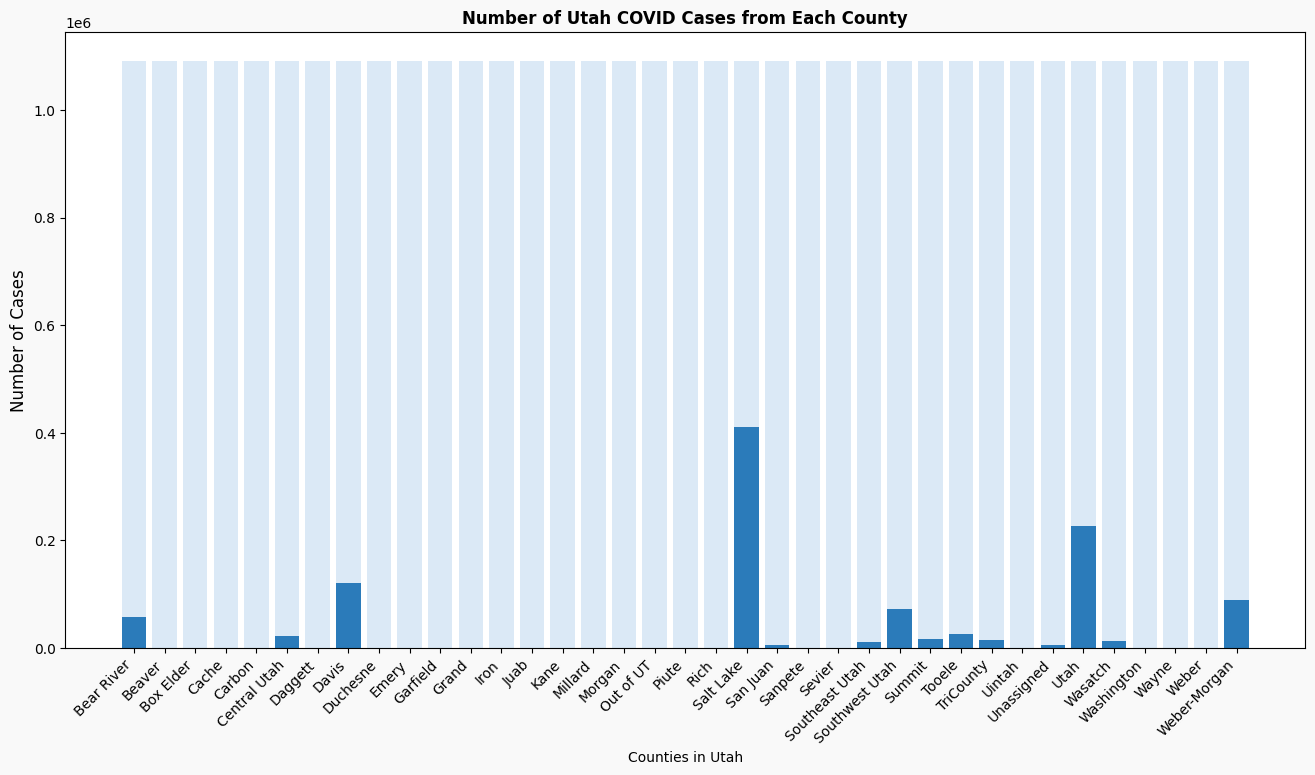

In [79]:
#stack bar chart looking at how many covid cases salt lake county contributed to utah's count

fig, ax1 = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('#f9f9f9') #set background color

palette=sns.color_palette('Blues', n_colors =6) #set color palette for the lines
color1=palette[4]
color2=palette[0]

for index, row in utahcountiesMax.iterrows():
    plt.bar(
        row['County'],  # x position
        row['Total'],  # height of county cases
        color=color1,  # color for county cases
        label='County Cases' if index == 0 else ""  # add legend only once
    )
    plt.bar(
        row['County'],  # x position
        row['RestofState'],  # height of rest of state cases
        bottom=row['Total'],  # start at the top of the county cases
        color=color2,  # color for rest of state cases
        label='Rest of State Cases' if index == 0 else ""  # add legend only once
    )

plt.title("Number of Utah COVID Cases from Each County", fontsize=12, fontweight ='bold')
plt.xlabel('Counties in Utah')
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()



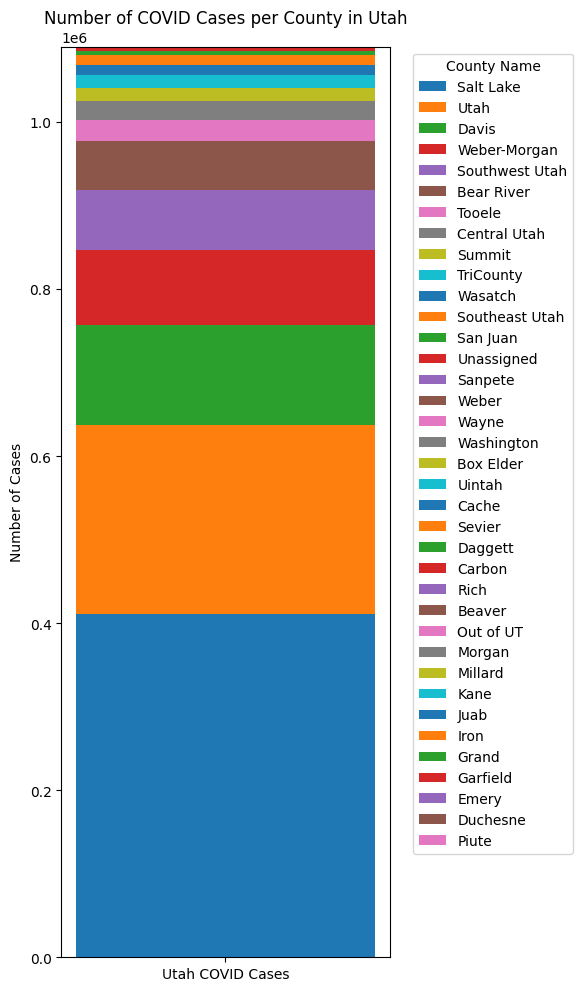

In [99]:
#same as above but using only one column to compare total cases across Utah counites

utah = utahcountiesMax.sort_values(by='Total', ascending = False)

counties = utah['County']
totalCases = utah['Total']

plt.figure(figsize=(6,10)) #plotsize

bottom_value = 0
for county, total in zip(counties,totalCases):
    plt.bar('Utah COVID Cases', total, bottom=bottom_value, label=county)
    bottom_value += total

plt.legend(counties, title="County Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of COVID Cases per County in Utah')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()
